# Stock Prices Prediction Using Keras Long Term Short Memory

![](https://miro.medium.com/proxy/1*xR4m0oOKz_jRgQU4Oge53g.jpeg)

In [0]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Importing the training set
df = pd.read_csv('sample_data/IYE_New_day.csv').fillna(0)
len(df)


df['Average'] = (df['High'] + df['Low'] )/2 
dataset_train = df[:1000]
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume,Average
0,4/22/2015,45.939999,46.290001,45.619999,46.110001,38.377151,718400,45.955000
1,4/23/2015,46.139999,46.770000,46.139999,46.459999,38.668457,805500,46.454999
2,4/24/2015,46.299999,46.340000,45.930000,46.119999,38.385483,610600,46.135000
3,4/27/2015,46.279999,46.450001,46.040001,46.110001,38.377151,823400,46.245001
4,4/28/2015,46.020000,46.410000,45.970001,46.360001,38.585232,969800,46.190000
...,...,...,...,...,...,...,...,...
995,4/4/2019,35.869999,36.189999,35.720001,36.160000,33.522892,756300,35.955000
996,4/5/2019,36.270000,36.849998,36.270000,36.799999,34.116215,534700,36.559999
997,4/8/2019,36.880001,37.169998,36.820000,36.980000,34.283089,536900,36.994999
998,4/9/2019,36.849998,36.849998,36.419998,36.529999,33.865910,485600,36.634998


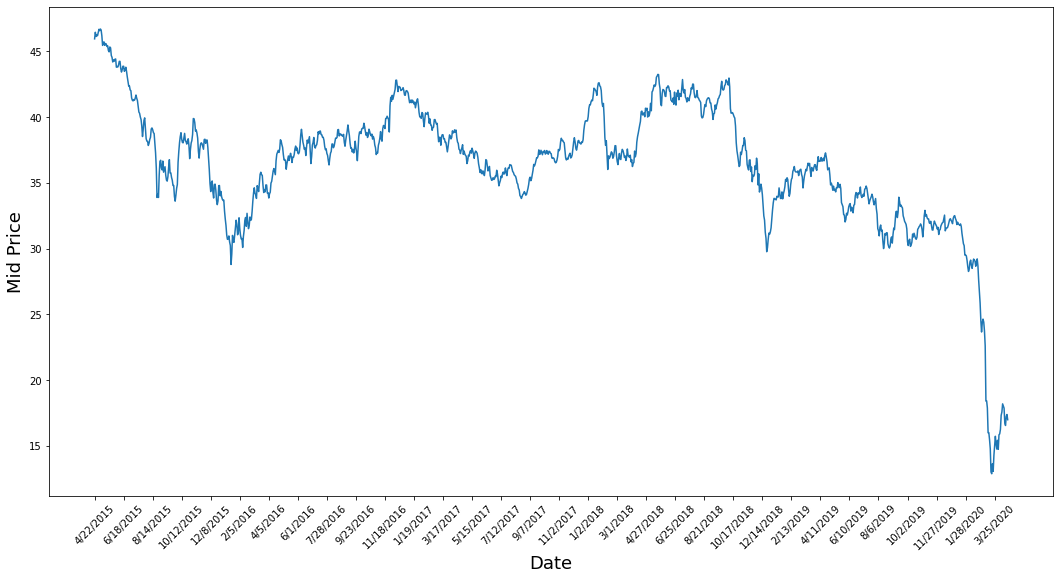

In [0]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],40),df['Date'].loc[::40],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [0]:
high_prices = df.loc[:,'High'].values
low_prices = df.loc[:,'Low'].values
mid_prices = (high_prices+low_prices)/2.0

In [0]:
training_set = mid_prices[:1000]
training_set

array([45.955    , 46.4549995, 46.135    , 46.245001 , 46.1900005,
       46.42     , 46.6800005, 46.58     , 46.705    , 46.619999 ,
       46.1849995, 45.455    , 45.695    , 45.719999 , 45.459999 ,
       45.6000005, 45.560001 , 45.370001 , 45.424999 , 45.0699995,
       44.964998 , 45.334999 , 45.2700005, 44.6850015, 44.545    ,
       44.195    , 44.3549995, 44.25     , 44.404999 , 44.4250015,
       43.799999 , 43.8549995, 43.8150005, 43.9650005, 44.244999 ,
       44.2399995, 43.709999 , 43.4299985, 43.6049995, 43.869999 ,
       43.8700005, 43.4850005, 43.58     , 43.795    , 43.484999 ,
       43.0700015, 42.7399995, 42.3600005, 42.3699985, 42.0649985,
       42.009998 , 41.460001 , 41.285    , 41.235001 , 41.335001 ,
       41.295    , 41.4449995, 41.68     , 41.4449995, 41.265001 ,
       40.799999 , 40.3899995, 40.289999 , 40.0100005, 39.820002 ,
       39.32     , 38.5250015, 39.0900005, 39.75     , 39.945    ,
       39.209999 , 38.365    , 38.18     , 38.155001 , 37.8449

In [0]:
training_set = training_set.reshape(-1,1)
#test_data = test_data.reshape(-1,1)
len(training_set)

1000

In [0]:
dataset_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Average
0,4/22/2015,45.939999,46.290001,45.619999,46.110001,38.377151,718400,45.955000
1,4/23/2015,46.139999,46.770000,46.139999,46.459999,38.668457,805500,46.454999
2,4/24/2015,46.299999,46.340000,45.930000,46.119999,38.385483,610600,46.135000
3,4/27/2015,46.279999,46.450001,46.040001,46.110001,38.377151,823400,46.245001
4,4/28/2015,46.020000,46.410000,45.970001,46.360001,38.585232,969800,46.190000


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [0]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
940/940 [==============================] - 5s 6ms/step - loss: 0.0428
Epoch 2/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0130
Epoch 3/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0103
Epoch 4/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0099
Epoch 5/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0088
Epoch 6/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0083
Epoch 7/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0079
Epoch 8/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0077
Epoch 9/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0085
Epoch 10/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0073
Epoch 11/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0081
Epoch 12/100
940/940 [==============================] - 4s 4ms/step - loss: 0.0071
Epoch 13/100


In [0]:
# Part 3 - Making the predictions and visualising the results
dataset_test = df[1000:]
testing_set = mid_prices[1000:]
testing_set = testing_set.reshape(-1,1)
print(len(testing_set))
real_stock_price = testing_set

259


In [0]:
print(len(dataset_train))
print(len(dataset_test))
dataset_total = pd.concat((dataset_train['Average'], dataset_test['Average']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

1000
259


array([[36.623436 ],
       [36.585728 ],
       [36.782158 ],
       [36.661816 ],
       [36.61524  ],
       [36.76     ],
       [36.670578 ],
       [36.931602 ],
       [37.166237 ],
       [36.993866 ],
       [36.64995  ],
       [36.089664 ],
       [35.96569  ],
       [36.062454 ],
       [35.732975 ],
       [35.0676   ],
       [34.90881  ],
       [34.823444 ],
       [34.570564 ],
       [34.659756 ],
       [34.543373 ],
       [34.508183 ],
       [34.382607 ],
       [34.517776 ],
       [34.600624 ],
       [34.873695 ],
       [34.830875 ],
       [34.668846 ],
       [34.751953 ],
       [34.619183 ],
       [33.85272  ],
       [33.347927 ],
       [33.12816  ],
       [32.75091  ],
       [32.54022  ],
       [32.213512 ],
       [32.138317 ],
       [32.452324 ],
       [32.62     ],
       [32.7815   ],
       [33.055603 ],
       [33.289993 ],
       [33.408573 ],
       [33.093327 ],
       [33.009983 ],
       [32.959423 ],
       [32.783882 ],
       [33.00

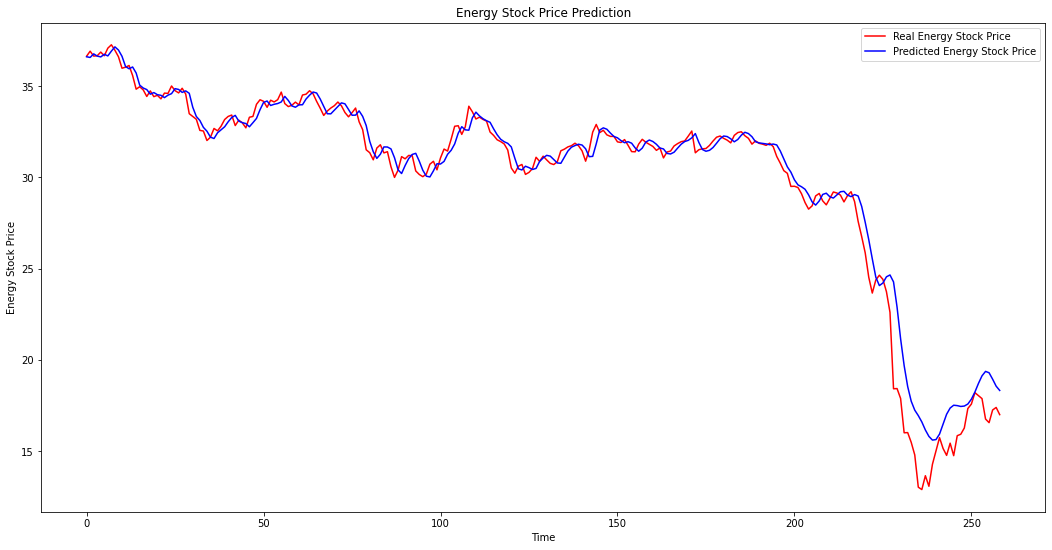

In [0]:
# Visualising the results
plt.figure(figsize = (18,9))
plt.plot(real_stock_price, color = 'red', label = 'Real Energy Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Energy Stock Price')
plt.title('Energy Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Energy Stock Price')
plt.legend()
plt.show()

In [0]:

from sklearn.metrics import mean_squared_error 

mean_squared_error(real_stock_price,predicted_stock_price) 

0.967080024158587

In [0]:


x = X_test[-1]
num_timesteps = 30
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
   
    prediction = regressor.predict(data)
    prediction = sc.inverse_transform(prediction)
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

x

array([[-0.57984369],
       [-0.57928529],
       [-0.60943613],
       [-0.71468456],
       [-0.71412619],
       [-0.74399777],
       [-0.78252373],
       [-0.8813512 ],
       [-0.88860972],
       [-0.84617532],
       [-0.87855946],
       [-0.81099944],
       [-0.77024009],
       [-0.72948074],
       [-0.7627024 ],
       [-0.7839196 ],
       [-0.74651033],
       [-0.78475712],
       [-0.72361812],
       [-0.71915128],
       [-0.70016753],
       [-0.64042437],
       [-0.62674486],
       [-0.59184807],
       [-0.60078171],
       [-0.60999436],
       [-0.67252931],
       [-0.68369631],
       [-0.64489112],
       [-0.63707423],
       [18.3177433 ],
       [45.83699799],
       [79.48163605],
       [89.87130737],
       [92.12969971],
       [92.87399292],
       [93.06763458],
       [93.11618042],
       [93.11460114],
       [93.0999527 ],
       [93.08384705],
       [93.07042694],
       [93.06053162],
       [93.05394745],
       [93.05001831],
       [93

In [0]:
data = np.expand_dims(x, axis=0)


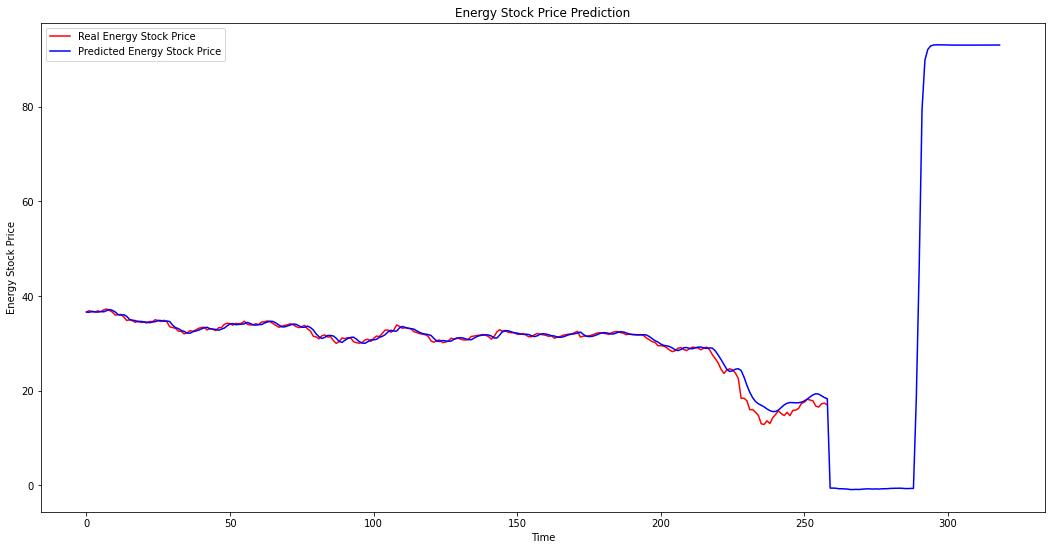

In [0]:
# Visualising the results
plt.figure(figsize = (18,9))
plt.plot(real_stock_price, color = 'red', label = 'Real Energy Stock Price')
plt.plot(np.concatenate((predicted_stock_price,x)), color = 'blue', label = 'Predicted Energy Stock Price')
plt.title('Energy Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Energy Stock Price')
plt.legend()
plt.show()

